In [1]:
import sys
import numpy as np
import scipy
# help (scipy)
import scipy.linalg
# help (scipy.linalg)
from scipy.linalg import lu_factor, lu_solve
# import scipy.linalg.decomp_lu as LUdec 

In [3]:
n = 2
A = np.array([[1, 2], [0.499, 1.001]])

print ('Norme di A:')
norm1 = np.linalg.norm(A,1)
norm2 =  np.linalg.norm(A,2)
normfro = np.linalg.norm(A,'fro')
norminf = np.linalg.norm(A,np.inf)

print('Norma1 = ', norm1, '\n')
print('Norma2 = ', norm2, '\n')
print('Normafro = ', normfro, '\n')
print('Norma infinito = ', norminf, '\n')

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)


print ('K(A)_1 = ', cond1, '\n')
print ('K(A)_2 = ', cond2, '\n')
print ('K(A)_fro =', condfro, '\n')
print ('K(A)_inf =', condinf, '\n')

# x = np.ones((4,1))
x = np.ones((2, 1))
b = np.dot(A,x)

btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2, 0.5]]).T

# Verificare che xtilde è soluzione di A xtilde = btilde
# A * xtilde = btilde
print ('A*xtilde = ', A.dot(xtilde) , '\n')

deltax = np.linalg.norm(x-xtilde, ord=2)
deltab = np.linalg.norm(b-btilde, ord=2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Normafro =  2.5002003919686118 

Norma infinito =  3.0 

K(A)_1 =  3001.0000000001082 

K(A)_2 =  2083.6668534103555 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 

A*xtilde =  [[3.    ]
 [1.4985]] 

delta x =  1.118033988749895
delta b =  0.0015000000000000568


In [4]:
"""2. fattorizzazione lu"""

# import numpy as np
# import scipy
# # help (scipy)
# import scipy.linalg
# # help (scipy.linalg)
# import scipy.linalg.decomp_lu as LUdec 
# help (LUdec)
# help(scipy.linalg.lu_solve )

# crazione dati e problema test
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ])
n = A.shape[1]
x = np.ones((n,1))
b = np.matmul(A,x)

condA = np.linalg.cond(A,1)

print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A)=', condA, '\n')


#help(LUdec.lu_factor)
lu, piv =lu_factor(A)

print('lu \n',lu,'\n')
print('piv \n',piv,'\n')


# risoluzione di    Ax = b   <--->  PLUx = b 
my_x=lu_solve((lu,piv),b)

print('my_x = \n', my_x)
print('norm =', scipy.linalg.norm(x-my_x, 'fro'))




x: 
 [[1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (4, 1) 

b: 
 [[ 1.]
 [ 6.]
 [-5.]
 [ 4.]] 

b.shape:  (4, 1) 

A: 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]] 

A.shape:  (4, 4) 

K(A)= 25.666666666666668 

lu 
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]] 

piv 
 [0 1 2 3] 

my_x = 
 [[1.]
 [1.]
 [1.]
 [1.]]
norm = 3.1401849173675503e-16


In [7]:
"""3. Choleski"""


# crazione dati e problema test
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ], dtype=float)
A = np.matmul(A, np.transpose(A)) #rendo matrice simmetrca
# x = np.ones((4,1))
x=np.ones((A.shape[1],1))
b = np.matmul(A,x)

condA = np.linalg.cond(A,2)

print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A)=', condA, '\n')

# decomposizione di Choleski
L = scipy.linalg.cholesky(A)
print('L:', L, '\n')

print('L.T*L =\n',L@L.T,'\n')
print('err = ', scipy.linalg.norm(A-np.matmul(L, np.transpose(L)), 'fro'))




[[ 3. -1.  1. -2.]
 [ 0.  2.  5. -1.]
 [ 1.  0. -7.  1.]
 [ 0.  2.  1.  1.]]
[[ 3.  0.  1.  0.]
 [-1.  2.  0.  2.]
 [ 1.  5. -7.  1.]
 [-2. -1.  1.  1.]]
[[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]]
[[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]]
x: 
 [[1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (4, 1) 

b: 
 [[11.]
 [ 7.]
 [ 3.]
 [ 5.]] 

b.shape:  (4, 1) 

A: 
 [[ 15.   5.  -6.  -3.]
 [  5.  30. -36.   8.]
 [ -6. -36.  51.  -6.]
 [ -3.   8.  -6.   6.]] 

A.shape:  (4, 4) 

K(A)= 201.87778922244505 

L: [[ 3.87298335  1.29099445 -1.54919334 -0.77459667]
 [ 0.          5.32290647 -6.38748777  1.69080559]
 [ 0.          0.          2.79284801  1.28900677]
 [ 0.          0.          0.          0.93789019]] 

L.T*L =
 [[ 19.66666667  15.45760384  -5.32512188  -0.72648662]
 [ 15.45760384  71.99215686 -15.65982264   1.58578997]
 [ -5.32512188 -15.65982264   9.46153846   1.20894681]
 [ -0.72648662   1.58578

In [3]:
"""4. Choleski con matrice di Hilbert"""


# crazione dati e problema test
n=10
A=scipy.linalg.hilbert(n)
x=np.ones((n,1))
b=np.matmul(A,x)

condA = np.linalg.cond(A,2)

print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('K(A)=', condA, '\n')

# decomposizione di Choleski
L = scipy.linalg.cholesky(A)
print('L:', L, '\n')

print('L.T*L =\n',L@L.T,'\n')
print('err = ', scipy.linalg.norm(A-np.matmul(L, np.transpose(L)), 'fro'))

y = scipy.linalg.solve(L, b) # L y = b
my_x = scipy.linalg.solve(L.T, y) # L.T my_x = y
print(y)
print('my_x = \n', my_x)
print('\n norm =', scipy.linalg.norm(x-my_x, 'fro'))



x: 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (10, 1) 

b: 
 [[2.92896825]
 [2.01987734]
 [1.60321068]
 [1.34680042]
 [1.16822899]
 [1.03489566]
 [0.93072899]
 [0.84669538]
 [0.77725094]
 [0.7187714 ]] 

b.shape:  (10, 1) 

A: 
 [[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08

In [7]:
"""5. Choleski con matrice di matrice tridiagonale simmetrica e definita positiva """



# crazione dati e problema test
n=6
A= np.eye(n)*9 +np.eye(n, k=1)*-4 + np.eye(n, k=-1)*-4
x= np.ones((n, 1))
b= np.matmul(A, x)
condA= np.linalg.cond(A, 2)
L= np.linalg.cholesky(A)

print('A: \n', A, '\n')
print('A.shape: ', A.shape, '\n' )
print('x: \n', x , '\n')
print('x.shape: ', x.shape, '\n' )
print('b: \n', b , '\n')
print('b.shape: ', b.shape, '\n' )
print('K(A)=', condA, '\n')

# decomposizione di Choleski
print('L:', L, '\n')

print('LL^t: \n',L@L.T,'\n')
print('err = ', scipy.linalg.norm(A-np.matmul(L, np.transpose(L)), 'fro'))

y = scipy.linalg.solve(L, b)      # L y = b
my_x = scipy.linalg.solve(L.T, y)
print('my_x = \n ', my_x)

print('norm =', scipy.linalg.norm(x-my_x, 'fro'))



A: 
 [[ 9. -4.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.]
 [ 0. -4.  9. -4.  0.  0.]
 [ 0.  0. -4.  9. -4.  0.]
 [ 0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0. -4.  9.]] 

A.shape:  (6, 6) 

x: 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 

x.shape:  (6, 1) 

b: 
 [[5.]
 [1.]
 [1.]
 [1.]
 [1.]
 [5.]] 

b.shape:  (6, 1) 

K(A)= 9.043247020775532 

L: [[ 3.          0.          0.          0.          0.          0.        ]
 [-1.33333333  2.68741925  0.          0.          0.          0.        ]
 [ 0.         -1.48841682  2.60472943  0.          0.          0.        ]
 [ 0.          0.         -1.53566814  2.57715412  0.          0.        ]
 [ 0.          0.          0.         -1.55209965  2.5672917   0.        ]
 [ 0.          0.          0.          0.         -1.55806214  2.56367751]] 

LL^t: 
 [[ 9. -4.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.]
 [ 0. -4.  9. -4.  0.  0.]
 [ 0.  0. -4.  9. -4.  0.]
 [ 0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0. -4.  9.]] 

err =  3.076740298213702e-15
m

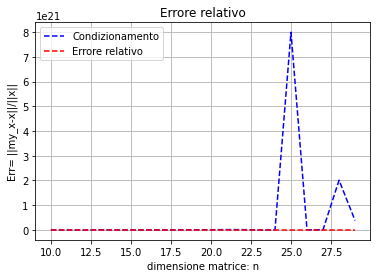

In [17]:
"""6. plots """

from scipy.linalg import lu_factor, lu_solve
# import scipy.linalg.decomp_lu as LUdec 
import matplotlib.pyplot as plt

K_A = np.zeros((20,1))
Err = np.zeros((20,1))

for n in np.arange(10,30):
    # crazione dati e problema test
    A=scipy.linalg.hilbert(n)
    x=np.ones((A.shape[1],1))
    b=np.matmul(A,x)
    
    # numero di condizione 
    K_A[n-10]=np.linalg.cond(A)
    
    # fattorizzazione 
    lu ,piv = lu_factor(A)
    my_x = lu_solve((lu,piv),b)
    
    # errore relativo
    Err[n-10] = np.linalg.norm(my_x-x,2)/np.linalg.norm(x)

  
x = np.arange(10,30)

# grafico del numero di condizione vs dim
# plt.figure(figsize=(20, 10))
plt.plot(x,K_A,color='blue', linestyle='--', label='Condizionamento')
plt.title('CONDIZIONAMENTO DI A ')
plt.xlabel('dimensione matrice: n')
plt.ylabel('K_A')


# grafico errore in norma 2 in funzione della dimensione del sistema
plt.plot(x,Err,color='red', linestyle='--', label='Errore relativo')
plt.title('Errore relativo')
plt.xlabel('dimensione matrice: n')
plt.ylabel('Err= ||my_x-x||/||x||')
plt.legend()
plt.grid()

plt.show()
